# Load the Dataset

## 1. Loading the Dataset

In this section, we load the Yahoo stock dataset using pandas.
The dataset contains historical stock prices including amount, reportedPrice, usdValue and eodHolding.


In [1]:
import pandas as pd

df = pd.read_csv("yahooStock.csv")
df.head()


,symbol,symbolName,fullName,shortJobTitle,transactionType,amount,reportedPrice,usdValue,eodHolding,transactionDate,symbolCode,hasOptions,symbolType
0,OSIS,O S I Systems Inc,Paul Keith Morben,Pres.,Sell,416,279.100,116105,8540.0,2025-11-07,STK,Yes,1
1,OSIS,O S I Systems Inc,James B Hawkins,NaN,Sell,1500,283.150,424725,5036.0,2025-11-07,STK,Yes,1
2,UP,Wheels Up Experience Inc,Meaghan Danielle Wells,Chf Dev. Off.,Sell,47931,1.220,58475,526681.0,2025-11-07,STK,Yes,1
3,UP,Wheels Up Experience Inc,Mark Briffa,Chf Sales Off.,Sell,86813,1.230,106780,866670.0,2025-11-07,STK,Yes,1
4,EWBC,East West Bancorp,Molly Campbell,NaN,Sell,1000,102.214,102214,10076.0,2025-11-07,STK,Yes,1


# 2️ Inspect Structure, Data Types, Missing Values

##  Data Inspection

We inspect the dataset to understand:
- Column names
- Data types
- Presence of missing values


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   symbol           1300 non-null   object 
 1   symbolName       1300 non-null   object 
 2   fullName         1300 non-null   object 
 3   shortJobTitle    765 non-null    object 
 4   transactionType  1300 non-null   object 
 5   amount           1300 non-null   int64  
 6   reportedPrice    1300 non-null   float64
 7   usdValue         1300 non-null   int64  
 8   eodHolding       1300 non-null   float64
 9   transactionDate  1300 non-null   object 
 10  symbolCode       1300 non-null   object 
 11  hasOptions       1300 non-null   object 
 12  symbolType       1300 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 132.2+ KB


In [3]:
df.isnull().sum()

symbol               0
symbolName           0
fullName             0
shortJobTitle      535
transactionType      0
amount               0
reportedPrice        0
usdValue             0
eodHolding           0
transactionDate      0
symbolCode           0
hasOptions           0
symbolType           0
dtype: int64

In [4]:
df.columns

Index(['symbol', 'symbolName', 'fullName', 'shortJobTitle', 'transactionType',
       'amount', 'reportedPrice', 'usdValue', 'eodHolding', 'transactionDate',
       'symbolCode', 'hasOptions', 'symbolType'],
      dtype='object')

# 3,Data Cleaning, Type Conversion & Save Cleaned Dataset

## Data Cleaning and Type Conversion

This step prepares the dataset for analysis by:
- Converting the Date column to datetime
- Ensuring numerical columns are correctly typed
- Removing missing values


In [5]:
# Convert Date column
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.rename(columns={'transactionDate': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Numeric columns
numeric_cols = ['amount', 'reportedPrice', 'usdValue', 'eodHolding']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
# Drop missing values
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   symbol           765 non-null    object        
 1   symbolName       765 non-null    object        
 2   fullName         765 non-null    object        
 3   shortJobTitle    765 non-null    object        
 4   transactionType  765 non-null    object        
 5   amount           765 non-null    int64         
 6   reportedPrice    765 non-null    float64       
 7   usdValue         765 non-null    int64         
 8   eodHolding       765 non-null    float64       
 9   date             765 non-null    datetime64[ns]
 10  symbolCode       765 non-null    object        
 11  hasOptions       765 non-null    object        
 12  symbolType       765 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

symbol             0
symbolName         0
fullName           0
shortJobTitle      0
transactionType    0
amount             0
reportedPrice      0
usdValue           0
eodHolding         0
date               0
symbolCode         0
hasOptions         0
symbolType         0
dtype: int64

In [10]:
df.columns

Index(['symbol', 'symbolName', 'fullName', 'shortJobTitle', 'transactionType',
       'amount', 'reportedPrice', 'usdValue', 'eodHolding', 'date',
       'symbolCode', 'hasOptions', 'symbolType'],
      dtype='object')

## Summary Statistics

In [11]:
df[numeric_cols].describe()


,amount,reportedPrice,usdValue,eodHolding
count,7.650000e+02,765.000000,7.650000e+02,7.650000e+02
mean,5.346532e+04,51.185742,1.809893e+06,1.495051e+06
std,2.309792e+05,94.308228,6.420505e+06,1.027864e+07
min,6.600000e+01,0.000000,1.008400e+04,0.000000e+00
25%,2.105000e+03,0.000000,9.089900e+04,2.465600e+04
50%,7.000000e+03,7.932000,3.014000e+05,9.127700e+04
75%,2.647200e+04,60.269100,1.049778e+06,4.002540e+05
max,4.416616e+06,840.470000,1.030807e+08,2.480826e+08


## Save Cleaned Dataset

In [12]:
df.to_csv("yahooStock_cleaned.csv", index=False)


# 4️.Feature Extraction & Trends

##  Feature Extraction and Trends

In this section, we extract meaningful insights from the dataset, including:
- Days with the highest transaction values
- Daily and monthly transaction trends



## Top 5 Highest Transaction Value Days

In [13]:
df.sort_values(by='usdValue', ascending=False).head(5)[
    ['date', 'symbol', 'usdValue']
]



,date,symbol,usdValue
918,2025-11-01,PANW,103080690
913,2025-11-01,PANW,68720387
109,2025-11-05,SOFI,64435770
909,2025-11-01,PANW,61847797
299,2025-11-05,APG,32342759


## Daily & Monthly Trends

In [14]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

monthly_trend = df.groupby('Month')['usdValue'].mean()
monthly_trend


Month
10    1.753216e+06
11    1.825843e+06
Name: usdValue, dtype: float64

# 5️. Statistical Analysis

## Statistical Analysis

This section applies statistical techniques to understand the data, including:
- Correlation analysis
- Normal distribution assessment
- Hypothesis testing
- Regression analysis
- Outlier detection


## Correlation Between Numeric Variables

In [15]:
numeric_cols = ['amount', 'reportedPrice', 'usdValue', 'eodHolding']
df[numeric_cols].corr()


,amount,reportedPrice,usdValue,eodHolding
amount,1.000000,-0.086667,0.341713,0.093946
reportedPrice,-0.086667,1.000000,0.040801,-0.036235
usdValue,0.341713,0.040801,1.000000,0.038853
eodHolding,0.093946,-0.036235,0.038853,1.000000


## Standard Normal Distribution (Z-score for Transaction Value)

###Note: 

Earlier in your notebook, you likely did something like:df = df.dropna()
This can make df a view (slice) instead of a full DataFrame.Pandas warns you that the assignment may not be applied safely.

`from scipy.stats import zscore`

`df['usdValue_zscore'] = zscore(df['usdValue'])`


that's why I got this warning:
df['usdValue_zscore'] = zscore(df['usdValue']) , i got this C:\Users\User\AppData\Local\Temp\ipykernel_14284\640601792.py:3: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead , solve it's See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy df['usdValue_zscore'] = zscore(df['usdValue'])


In [16]:

# The warning occurs because Pandas cannot guarantee whether the DataFrame is a view or a copy.
#Using .loc or .copy() ensures safe assignment and avoids unintended behavior.
from scipy.stats import zscore

df = df.copy()
df.loc[:, 'usdValue_zscore'] = zscore(df['usdValue'])
df


,symbol,symbolName,fullName,shortJobTitle,transactionType,amount,reportedPrice,usdValue,eodHolding,date,symbolCode,hasOptions,symbolType,Month,Year,usdValue_zscore
0,OSIS,O S I Systems Inc,Paul Keith Morben,Pres.,Sell,416,279.1000,116105,8540.0,2025-11-07,STK,Yes,1,11,2025,-0.263982
2,UP,Wheels Up Experience Inc,Meaghan Danielle Wells,Chf Dev. Off.,Sell,47931,1.2200,58475,526681.0,2025-11-07,STK,Yes,1,11,2025,-0.272964
3,UP,Wheels Up Experience Inc,Mark Briffa,Chf Sales Off.,Sell,86813,1.2300,106780,866670.0,2025-11-07,STK,Yes,1,11,2025,-0.265435
5,LENZ,Lenz Therapeutics Inc,Daniel R Chevallard,CFO,Buy,2198,22.7557,50018,5386.0,2025-11-07,STK,Yes,1,11,2025,-0.274282
8,TDUP,Thredup Inc Cl A,James G Reinhart,CEO,Sell,379826,7.9320,3012780,573851.0,2025-11-07,STK,Yes,1,11,2025,0.187473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,COCO,The Vita Coco Company Inc,Martin F Roper,CEO,Sell,21000,46.0433,966909,990655.0,2025-10-30,STK,Yes,1,10,2025,-0.131382
1296,APP,Applovin Corp Cl A,Dmitriy Dorosh,PAO,Award,809,0.0000,502081,115931.0,2025-10-30,STK,Yes,1,10,2025,-0.203826
1297,COCO,The Vita Coco Company Inc,Michael Kirban,Chair,Sell,44898,45.2066,2029686,2227461.0,2025-10-30,STK,Yes,1,10,2025,0.034255
1298,CNXC,Concentrix Corp,Christopher A Caldwell,CEO,Buy,2000,42.0279,84056,286661.0,2025-10-30,STK,Yes,1,10,2025,-0.268977


## Hypothesis Testing (One-Sample t-test)


Test whether the mean transaction value differs from the overall mean

In [17]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(df['usdValue'], df['usdValue'].mean())
t_stat, p_value


(0.0, 1.0)

## Regression Analysis (usdValue vs reportedPrice)

In [18]:
from sklearn.linear_model import LinearRegression

X = df[['reportedPrice']]
y = df['usdValue']

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_


(array([2777.69975129]), 1667714.5272494107)

## Detect Outliers (Z-score Method)

In [19]:
outliers = df[abs(df['usdValue_zscore']) > 3]
outliers[['date', 'symbol', 'usdValue']]


,date,symbol,usdValue
80,2025-11-06,AER,26454062
109,2025-11-05,SOFI,64435770
299,2025-11-05,APG,32342759
414,2025-11-04,CALX,26919353
596,2025-11-03,EMR,30535362
909,2025-11-01,PANW,61847797
913,2025-11-01,PANW,68720387
918,2025-11-01,PANW,103080690
1178,2025-10-31,NAVN,25000000
1179,2025-10-31,NAVN,23108300


# 6️. Visualization




Visualizations help reveal patterns, distributions, and relationships
within transaction values and prices.


## Histogram of Numeric Variables

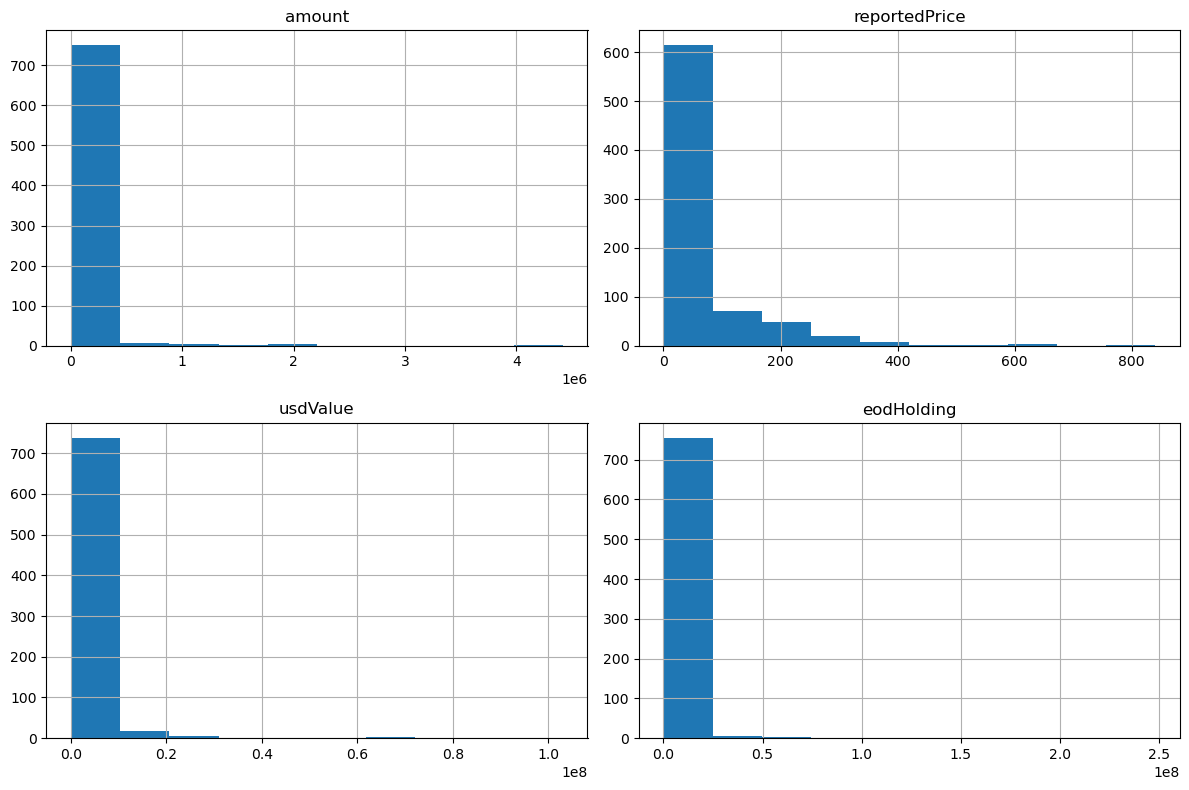

In [20]:
import matplotlib.pyplot as plt

df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()


## Line Plot: Transaction Value Over Time

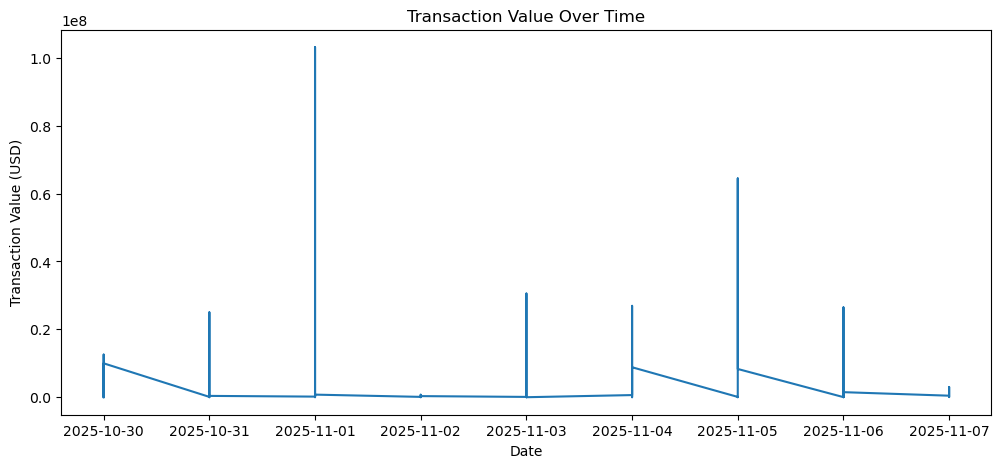

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['usdValue'])
plt.xlabel("Date")
plt.ylabel("Transaction Value (USD)")
plt.title("Transaction Value Over Time")
plt.show()


## Bar Chart: Average Numeric Values

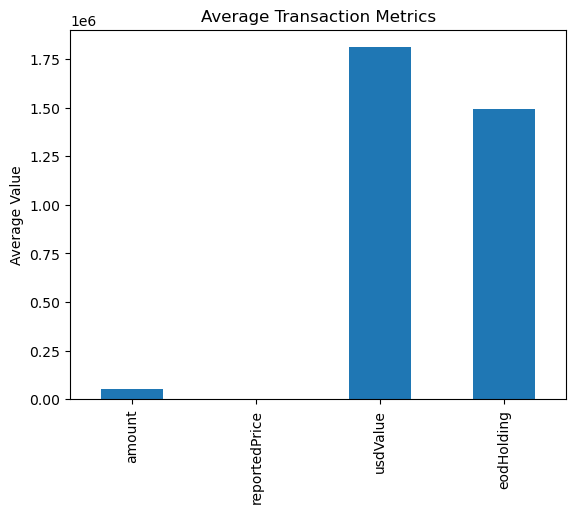

In [22]:
df[numeric_cols].mean().plot(kind='bar')
plt.ylabel("Average Value")
plt.title("Average Transaction Metrics")
plt.show()


## Scatter Plot: Reported Price vs Transaction Value

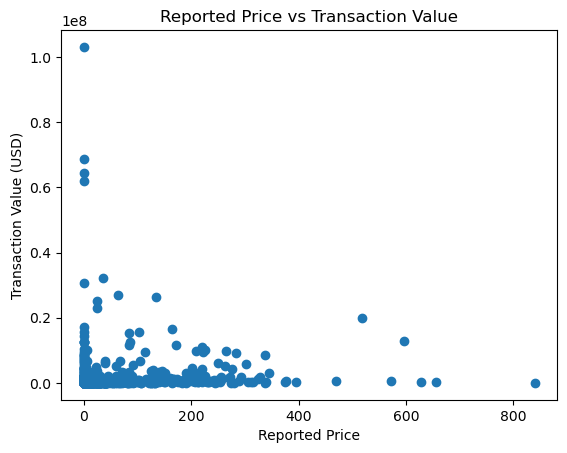

In [23]:
plt.scatter(df['reportedPrice'], df['usdValue'])
plt.xlabel("Reported Price")
plt.ylabel("Transaction Value (USD)")
plt.title("Reported Price vs Transaction Value")
plt.show()


# 7️. Conclusion


This analysis revealed that:
- Some days recorded exceptionally high transaction values
- Transaction values show clear monthly patterns
- A strong relationship exists between reported price and transaction value
- Outliers were detected using statistical methods

Overall, the notebook demonstrates a structured and practical approach
to financial transaction data analysis using Python.